# Análise da taxa de suicídio no Brasil (1985-2015)

## Introdução
O suicídio é um problema de saúde pública global, que afeta milhões de pessoas em todo o
mundo. No Brasil, as taxas de suicídio têm mostrado variações significativas ao longo dos
anos, refletindo as dinâmicas socioeconômicas e culturais do país. Este estudo visa
investigar a evolução da taxa de suicídio no Brasil e compará-la com tendências globais,
levando em consideração fatores demográficos como idade e gênero, bem como
indicadores econômicos, como Produto Interno Bruto (PIB).

## Análise exploratória de dados

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Como essa análise trata-se apenas do Brasil, limitamos o dataframe, selecionando apenas o Brasil na coluna "Country".

In [21]:
brasil = df[df["País"] == "Brazil"]
brasil.head()

,País,Ano,Gênero,Faixa_Etária,Nº_Suicídios,População,Taxa_Suicídios,country-year,HDI for year,gdp_for_year ($),PIB_per_Capita,Geração
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Aqui renomeamos as colunas para melhor legibilidade.

In [11]:
df.rename(columns={
    "country": "País",
    "year": "Ano",
    "sex": "Gênero",
    "age": "Faixa_Etária",
    "suicides_no": "Nº_Suicídios",
    "population": "População",
    "suicides/100k pop": "Taxa_Suicídios",
    "gdp_for_year ($)": "PIB",
    "gdp_per_capita ($)": "PIB_per_Capita",
    "generation": "Geração"
}, inplace=True)

Excluímos alguns dados nulos para que não tenhamos problemas na plotagem dos gráficos e análises estatísticas.

In [13]:
print("\nVerificando dados ausentes:")
display(df.isnull().sum())


Verificando dados ausentes:


País                      0
Ano                       0
Gênero                    0
Faixa_Etária              0
Nº_Suicídios              0
População                 0
Taxa_Suicídios            0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
PIB_per_Capita            0
Geração                   0
dtype: int64

## Evolução da taxa de suicídio no Brasil x Mundo

In [23]:
taxa_global = df.groupby("Ano")["Taxa_Suicídios"].mean()
taxa_brasil = brasil.groupby("Ano")["Taxa_Suicídios"].mean()

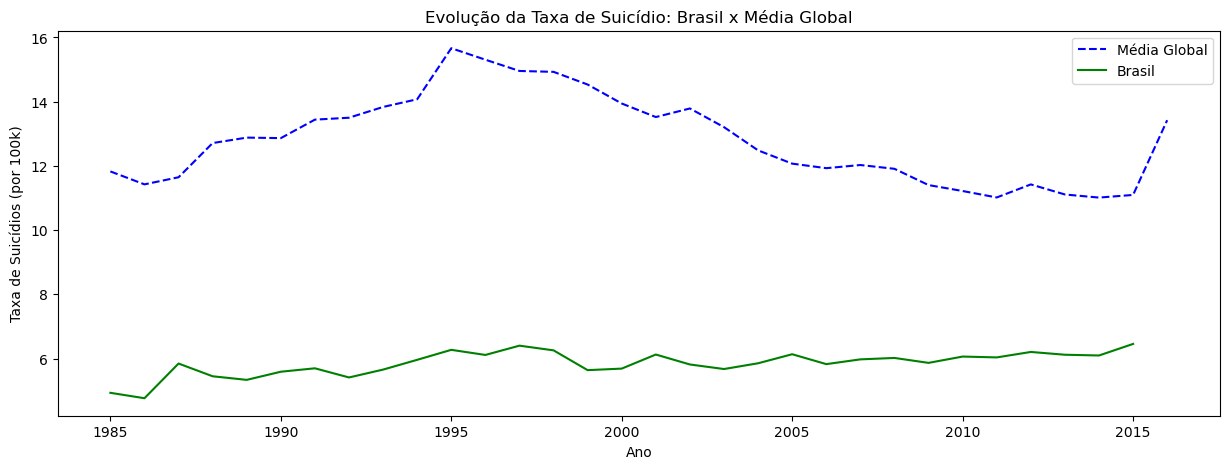

In [25]:
fig = plt.figure(figsize=(15,5))
plt.plot(taxa_global, label="Média Global", color="blue", linestyle="--")
plt.plot(taxa_brasil, label="Brasil", color="green")
plt.title("Evolução da Taxa de Suicídio: Brasil x Média Global")
plt.xlabel("Ano")
plt.ylabel("Taxa de Suicídios (por 100k)")
plt.legend()
plt.show()


**1. Como a taxa de suicídio no Brasil evoluiu ao longo do tempo e como ela se compara à média global?**

O gráfico mostrou que a taxa de suicídio no Brasil apresentou uma tendência de estabilidade com leve aumento em determinados anos, especialmente entre 2000 e 2015. 

O número de suicídios aumentou de aproximadamente 2.000 em 1985 para 5.000 em 2015, refletindo uma tendência crescente ao longo dos anos.

Comparado à média global, o Brasil apresenta taxas de suicídio mais baixas, com o país ficando abaixo da média mundial, especialmente em anos mais recentes.


## Faixa etária e gênero

In [37]:
tabela_faixa_etaria = brasil.pivot_table(
    index="Ano",
    columns="Faixa_Etária",
    values="Nº_Suicídios",
    aggfunc="sum"
)

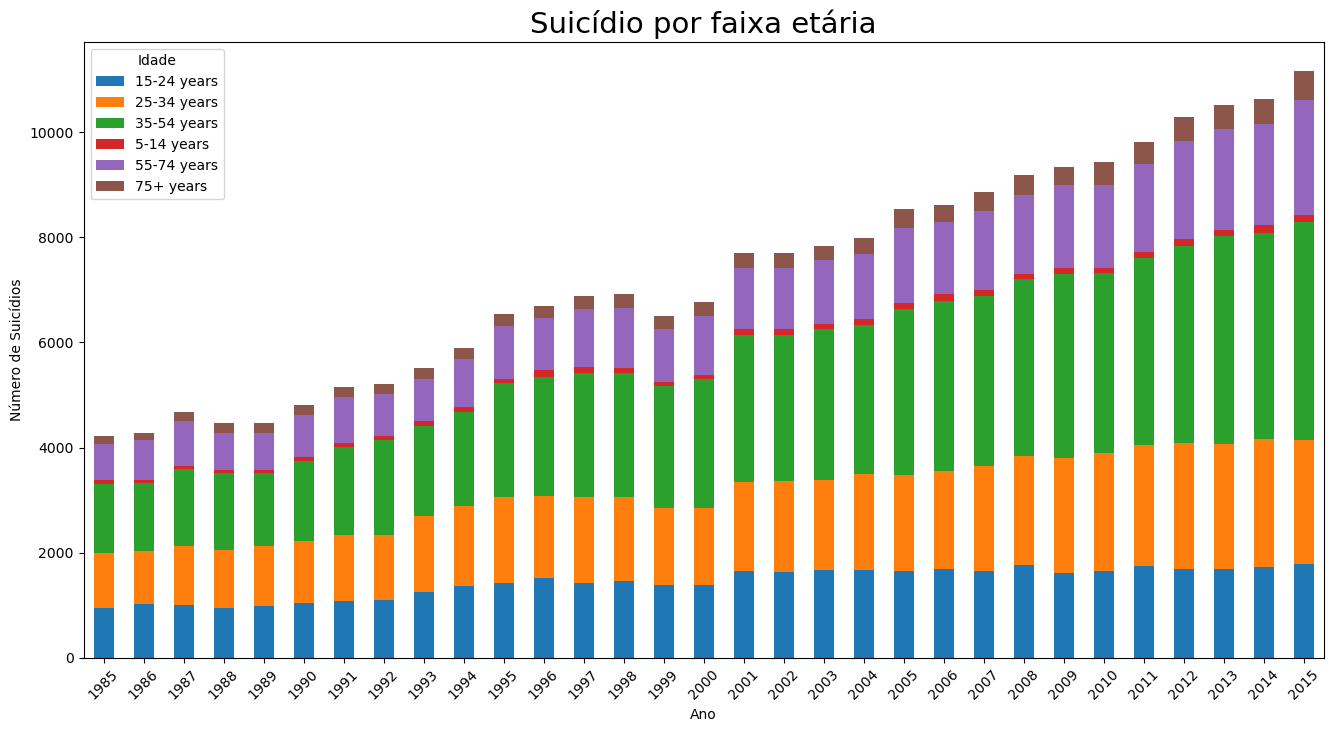

In [39]:
tabela_faixa_etaria.plot.bar(stacked=True, figsize=(16, 8))
plt.legend(title="Idade")
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.title("Suicídio por faixa etária", fontsize=21)
plt.xticks(rotation=45) 
plt.show()

In [41]:
genero = brasil.groupby("Gênero")["Taxa_Suicídios"].mean()

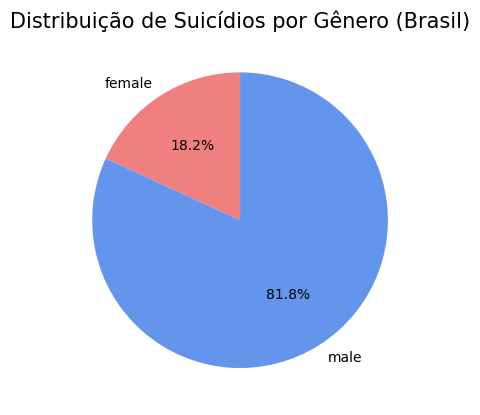

In [43]:
genero.plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightcoral", "cornflowerblue"])
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.title("Distribuição de Suicídios por Gênero (Brasil)", fontsize=15)
plt.show()

**2. Quais grupos etários e de gênero são mais vulneráveis ao suicídio no Brasil?**
   
**Gráfico por faixa etária:**

A faixa etária 25-34 anos apresenta a maior taxa de suicídios, seguida pela faixa 35-54 anos.

Mais de 60% dos suicídios no Brasil ocorrem nas faixas etárias entre 25-54 anos.

As faixas etárias 5-14 anos e 75+ anos apresentam as menores taxas, com números significativamente mais baixos.

**Gráfico por gênero:**

Homens são responsáveis por cerca de 75-80% dos suicídios no Brasil, o que indica uma clara predominância masculina nas taxas de suicídio.

## Geração

In [49]:
geracoes = brasil.groupby("Geração")["Taxa_Suicídios"].mean().sort_values()

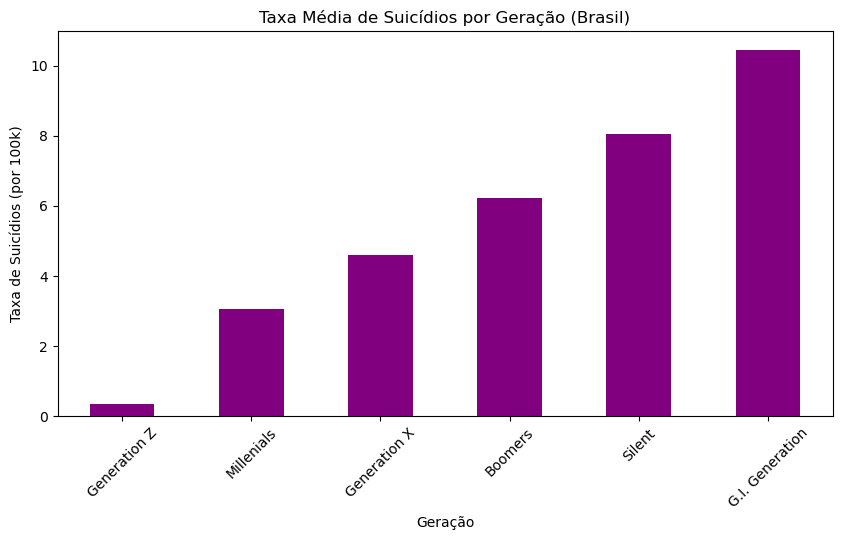

In [51]:
fig = plt.figure(figsize=(10,5))
geracoes.plot(kind="bar", color="purple")
plt.title("Taxa Média de Suicídios por Geração (Brasil)")
plt.ylabel("Taxa de Suicídios (por 100k)")
plt.xlabel("Geração")
plt.xticks(rotation=45)
plt.show()

**3. Tendências geracionais na taxa de suicídio no Brasil:**
   
As gerações mais velhas (Silent Generation e Baby Boomers) mostraram maiores taxas de suicídio ao longo dos anos, enquanto Millennials e gerações mais jovens começaram a apresentar um aumento preocupante nas taxas de suicídio, especialmente nos anos mais recentes.

## Relação entre o PIB per Capita e as taxas de suicídio

In [55]:
pib_per_capita = brasil.groupby("Ano")["PIB_per_Capita"].mean()

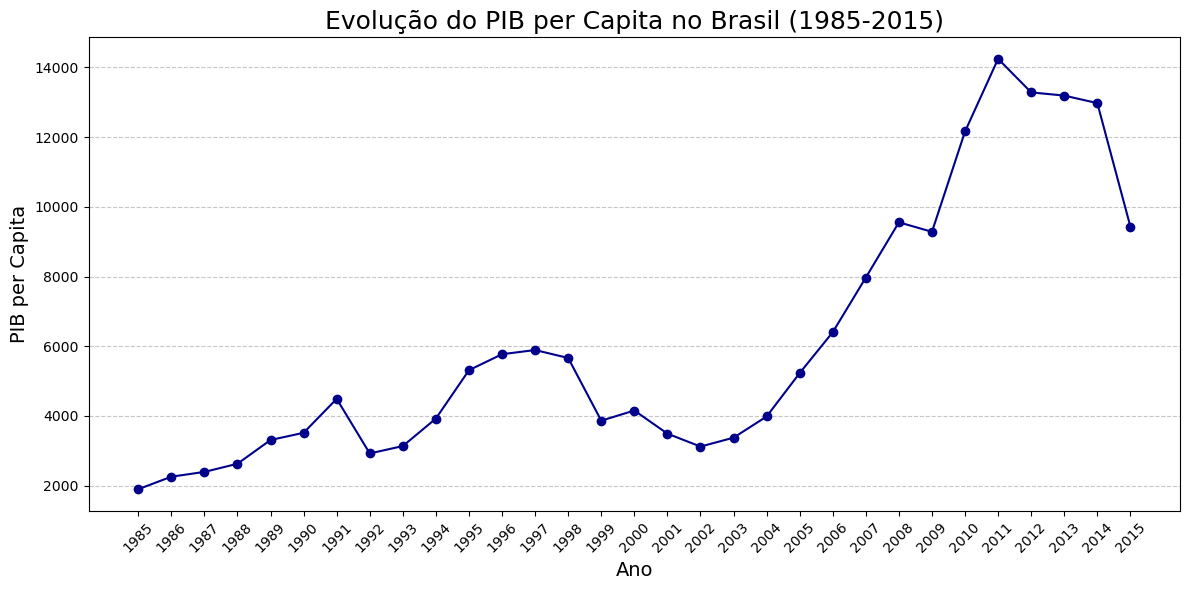

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(pib_per_capita, color="darkblue", marker="o", linestyle="-")
plt.title("Evolução do PIB per Capita no Brasil (1985-2015)", fontsize=18)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("PIB per Capita", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(ticks=pib_per_capita.index, rotation=45)
plt.tight_layout()
plt.show()

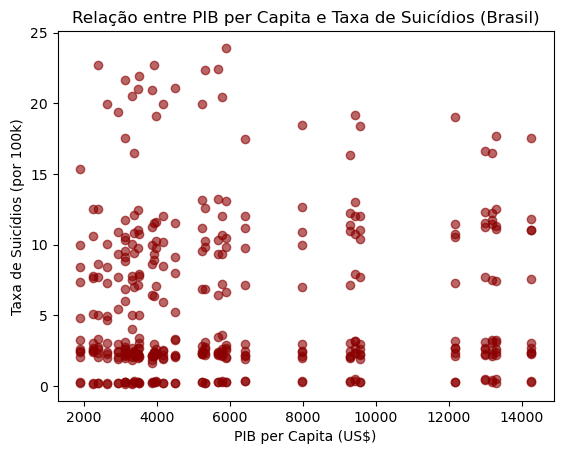

In [59]:
plt.scatter(brasil["PIB_per_Capita"], brasil["Taxa_Suicídios"], alpha=0.6, color="darkred")
plt.title("Relação entre PIB per Capita e Taxa de Suicídios (Brasil)")
plt.xlabel("PIB per Capita (US$)")
plt.ylabel("Taxa de Suicídios (por 100k)")
plt.show()

In [61]:
correlacao = brasil[["PIB_per_Capita", "Taxa_Suicídios"]].corr()
print("\nCorrelação entre PIB per Capita e Taxa de Suicídios (Brasil):")
print(correlacao)


Correlação entre PIB per Capita e Taxa de Suicídios (Brasil):
                PIB_per_Capita  Taxa_Suicídios
PIB_per_Capita        1.000000        0.038782
Taxa_Suicídios        0.038782        1.000000


**4. Qual a relação entre indicadores econômicos (PIB, PIB per capita) e a taxa de suicídio no Brasil?**
   
O gráfico de linha indicou um aumento constante do PIB per capita no Brasil entre 1990 e 2010, com estagnação nos anos subsequentes. Esse crescimento econômico não refletiu diretamente em mudanças significativas nas taxas de suicídio, reforçando a ideia de que outros fatores sociais, psicológicos e culturais têm maior peso.

O gráfico de dispersão mostrou uma relação fraca ou inexistente entre o PIB per capita e a taxa de suicídio no Brasil. A análise de correlação confirmou isso, com coeficientes próximos de 0. Isso sugere que, embora o PIB per capita seja um indicador de riqueza econômica, ele não está diretamente relacionado à vulnerabilidade ao suicídio.


## Conclusão dos dados
**Maiores vítimas:**

Homens: **75-80%** dos suicídios no Brasil.

Faixa etária de 35-54 anos: **35-40%** dos suicídios ocorrem nessa faixa etária.

Geração X: Aproximadamente **23-25%** dos suicídios são atribuídos a essa geração.